
# Tutorial
In this notebook we will perform an convolution autoencoder with different layers, and test it over the **MNIST** dataset to observe how different architectures affects the accuracy and result of the model.


An **autoencoder** is a type of **artificial neural network** used to learn efficient codings of unlabeled data (unsupervised learning). An autoencoder learns two functions: an encoding function that transforms the input data, and a decoding function that recreates the input data from the encoded representation. The autoencoder learns an **efficient representation** (encoding) for a set of data, typically for dimensionality reduction.


In [1]:
pip install wandb

We will be using torchvision libarary and using matplotlib and wandb to to see results

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import wandb
import tensorflow as tf
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim

Now we will set up our model and train loader of the MNIST dataset and show some trainig samples

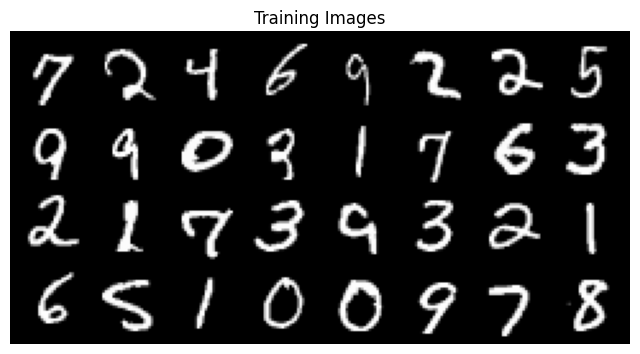

In [23]:
import torchvision.utils as vutils
Transform = transforms.Compose([transforms.ToTensor()])

batch_size = 32

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=Transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=Transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Plot some training images
real_batch = next(iter(trainloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))


Now we will define in **sepereate** our AutoEncoder and decoder networks






In [3]:
import torch.nn as nn

class Encoder(nn.Module):
    def __init__(self, latent_dim):
        super(Encoder, self).__init__()
        self.latent_dim = latent_dim
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1) # 32 x 32 -> 32-1/2 + 1 = 16x16
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1) # 16x16 -> 16-1/2 + 1 = 8x8
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1) # 8x8 -> 8-1/2 + 1 = 4x4
        self.fc = nn.Linear(64 * 4 * 4, latent_dim) #
        self.relu = nn.ReLU()

    def forward(self, x):
        # print(x.shape)
        x = self.relu(self.conv1(x))
        # print(x.shape)
        x = self.relu(self.conv2(x))
        # print(x.shape)
        x = self.relu(self.conv3(x))
        # print(x.shape)
        x = x.view(-1, 64 * 4 * 4)
        # print(x.shape)
        x = self.fc(x)
        return x


In [4]:
class Decoder(nn.Module):
    def __init__(self, latent_dim):
        super(Decoder, self).__init__()
        self.latent_dim = latent_dim
        self.fc = nn.Linear(latent_dim, 64 * 4 * 4)
        self.deconv1 = nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1)
        self.deconv2 = nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1)
        self.deconv3 = nn.ConvTranspose2d(16, 1, kernel_size=4, stride=2, padding=1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()

    def forward(self, x):
        # print(x.shape)
        x = self.fc(x)
        x = x.view(-1, 64, 4, 4)
        # print(x.shape)
        x = self.relu(self.deconv1(x))
        # print(x.shape)
        x = self.relu(self.deconv2(x))
        # print(x.shape)
        x = self.sigmoid(self.deconv3(x))
        # print(x.shape)
        return x


Now we will define our Autoencoder :

In [5]:
class Autoencoder(nn.Module):
    def __init__(self, d):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder(d)
        self.decoder = Decoder(d)

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [6]:


class Encoder2Conv(nn.Module):
    def __init__(self, latent_dim):
        super(Encoder2Conv, self).__init__()
        self.latent_dim = latent_dim
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1) # 32 x 32 -> 32-1/2 + 1 = 16x16
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1) # 16x16 -> 16-1/2 + 1 = 8x8
        self.fc = nn.Linear(32 * 8 * 8, latent_dim) #
        self.relu = nn.ReLU()

    def forward(self, x):
        # print(x.shape)
        x = self.relu(self.conv1(x))
        # print(x.shape)
        x = self.relu(self.conv2(x))
        # print(x.shape)
        # print(x.shape)
        x = x.view(-1, 32 * 8 * 8)
        # print(x.shape)
        x = self.fc(x)
        return x

class Decoder2Conv(nn.Module):
    def __init__(self, latent_dim):
        super(Decoder2Conv, self).__init__()
        self.latent_dim = latent_dim
        self.fc = nn.Linear(latent_dim, 32 * 8 * 8)
        self.deconv2 = nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1)
        self.deconv3 = nn.ConvTranspose2d(16, 1, kernel_size=4, stride=2, padding=1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()

    def forward(self, x):
        # print(x.shape)
        x = self.fc(x)
        x = x.view(-1, 32, 8, 8)
        # print(x.shape)
        # print(x.shape)
        x = self.relu(self.deconv2(x))
        # print(x.shape)
        x = self.sigmoid(self.deconv3(x))
        # print(x.shape)
        return x

class Autoencoder2Conv(nn.Module):
    def __init__(self, d):
        super(Autoencoder2Conv, self).__init__()
        self.encoder = Encoder2Conv(d)
        self.decoder = Decoder2Conv(d)

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x



In [7]:


class Encoder1Conv(nn.Module):
    def __init__(self, latent_dim):
        super(Encoder2Conv, self).__init__()
        self.latent_dim = latent_dim
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1) # 32 x 32 -> 32-1/2 + 1 = 16x16
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1) # 16x16 -> 16-1/2 + 1 = 8x8
        self.fc = nn.Linear(32 * 8 * 8, latent_dim) #
        self.relu = nn.ReLU()

    def forward(self, x):
        # print(x.shape)
        x = self.relu(self.conv1(x))
        # print(x.shape)
        x = self.relu(self.conv2(x))
        # print(x.shape)
        # print(x.shape)
        x = x.view(-1, 32 * 8 * 8)
        # print(x.shape)
        x = self.fc(x)
        return x

class Decoder1Conv(nn.Module):
    def __init__(self, latent_dim):
        super(Decoder2Conv, self).__init__()
        self.latent_dim = latent_dim
        self.fc = nn.Linear(latent_dim, 32 * 8 * 8)
        self.deconv2 = nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1)
        self.deconv3 = nn.ConvTranspose2d(16, 1, kernel_size=4, stride=2, padding=1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()

    def forward(self, x):
        # print(x.shape)
        x = self.fc(x)
        x = x.view(-1, 32, 8, 8)
        # print(x.shape)
        # print(x.shape)
        x = self.relu(self.deconv2(x))
        # print(x.shape)
        x = self.sigmoid(self.deconv3(x))
        # print(x.shape)
        return x

class Autoencoder1Conv(nn.Module):
    def __init__(self, d):
        super(Autoencoder2Conv, self).__init__()
        self.encoder = Encoder2Conv(d)
        self.decoder = Decoder2Conv(d)

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x



We will be using different loss function such as MSELoss, and will be using different sizes of latents spaces in order to investigate which dimension will result in great accuracy but also in effiency. Using **ADAM** optimizer should give us best results.

In [9]:

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
LEARNING_RATE = 0.001

criterion = nn.MSELoss()
autoencoder = Autoencoder(d=30).to(device)
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
import multiprocessing
multiprocessing.set_start_method('spawn', True)


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In this code section we will perform the training part of our auto encdoer we define before by using gradient decent method using learning rate 0.001

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

# Define hyperparameters
learning_rate = 0.001
num_epochs = 5
epochs_loss = []
# wandb.login()
wandb.init(project="emnist")
# Train loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for batch_idx, (data, _) in enumerate(trainloader):
        # print(len(trainloader), len(trainloader) / batch_size)
        optimizer.zero_grad()
        data  = data.to(device)
        data = F.pad(data, pad=(2, 2, 2, 2), mode='constant', value=0) # Padding input image from 28x28 -> 32x32
        # Forward pass
        recon = autoencoder(data)
        loss = criterion(recon, data)
        images_ = wandb.Image(data, caption="Top: Output, Bottom: Input")
        wandb.log({"Original images": images_, 'num iter': batch_idx})

        reconsturction_images = wandb.Image(recon, caption="Top: Output, Bottom: Input")
        wandb.log({"reconsturction images": reconsturction_images})
        # Backward pass and optimization step
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch_idx % 100 == 99:    # print every 100 batches
            # print('[%d, %5d] loss: %.3f' % (epoch + 1, batch_idx + 1, loss.item() ))
            wandb.log({'Train loss' : loss.item()})
            running_loss = 0.0

    epoch_loss = running_loss / len(trainloader)
    epochs_loss.append(epoch_loss)
    # print('Epoch %d loss: %.3f' % (epoch + 1, epoch_loss))
    wandb.log({'Epoch loss' : epoch_loss,  'Epoch' : epoch})


torch.save(autoencoder.state_dict(), "conv_autoencoder.pth")

**Testing**
In this code section we will use our testloader and check the loss of our model

In [ ]:
import matplotlib.pyplot as plt
wandb.init(project='emnist')
autoencoder = Autoencoder(d=30).to(device)
autoencoder.load_state_dict(torch.load("/content/conv_autoencoder.pth"))


test_loss = 0.0
num_samples = 0
with torch.no_grad():
    for data, _ in testloader:
        data = data.to(device)
        data = F.pad(data, pad=(2, 2, 2, 2), mode='constant', value=0) # Padding input image from 28x28 -> 32x32
        recon = autoencoder(data)
        test_loss += criterion(recon, data).item() * data.size(0)
        num_samples += data.size(0)
test_loss /= num_samples
print('Test loss: %.3f' % (test_loss))
wandb.log({'Test loss' : test_loss})



Interpolation. Once you have trained the AE, you can use it to interpolate between two digits in latent space. That is, let I1 and I2 be images of two different digits, perform the interpolation D((E(I1)*)+(E(I2)*(1-))) for a [0,1] where D denotes the decoder and E the encoder.
We will check it for deifferent sizes of latens dimensions and for different digits.


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

autoencoder = Autoencoder(30).to(device)
autoencoder.load_state_dict(torch.load("/content/conv_autoencoder.pth"))
wandb.init(project='emnist')

import torch
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

# Define the transformation for the dataset images
transform = transforms.Compose(
    transforms.ToTensor())

# Load the MNIST dataset
# train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# Define the indices for digit 2 and digit 7
digit_2_indices = [i for i, (_, label) in enumerate(trainset) if label == 2]
digit_7_indices = [i for i, (_, label) in enumerate(trainset) if label == 7]

digit_6_indices = [i for i, (_, label) in enumerate(trainset) if label == 6]
digit_9_indices = [i for i, (_, label) in enumerate(trainset) if label == 9]


digit_1_indices = [i for i, (_, label) in enumerate(trainset) if label == 1]
digit_0_indices = [i for i, (_, label) in enumerate(trainset) if label == 0]

# Define the number of samples to use from each digit
num_samples = 100

# Select a subset of the data for each digit
digit_2_subset = SubsetRandomSampler(digit_2_indices[:num_samples])
digit_7_subset = SubsetRandomSampler(digit_7_indices[:num_samples])

digit_6_subset = SubsetRandomSampler(digit_6_indices[:num_samples])
digit_9_subset = SubsetRandomSampler(digit_9_indices[:num_samples])

digit_1_subset = SubsetRandomSampler(digit_1_indices[:num_samples])
digit_0_subset = SubsetRandomSampler(digit_0_indices[:num_samples])


# Combine the subsets and shuffle the data
# indices = digit_2_subset.indices + digit_7_subset.indices
indices = digit_6_subset.indices + digit_9_subset.indices
torch.manual_seed(0)


# Create a DataLoader for the combined dataset
batch_size = 32
data_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, sampler=SubsetRandomSampler(indices))

# Generate interpolated images
digit1 = 6
digit2 = 9

for i, (images, labels) in enumerate(data_loader):
    # Select only images of digit1 and digit2
    idx1 = (labels == digit1).nonzero().squeeze()
    idx2 = (labels == digit2).nonzero().squeeze()
    if len(idx1) == 0 or len(idx2) == 0:
        continue
    images1 = images[idx1[0]]
    images2 = images[idx2[0]]
    images1 = F.pad(images1, pad=(2, 2, 2, 2), mode='constant', value=0) # Padding input image from 28x28 -> 32x32
    images2 = F.pad(images2, pad=(2, 2, 2, 2), mode='constant', value=0) # Padding input image from 28x28 -> 32x32
    print(images1.size())
    print(images2.size())

    # Encode the images
    encoded1 = autoencoder.encoder(images1.to(device))
    encoded2 = autoencoder.encoder(images2.to(device))
    print(encoded1.size())
    print(encoded2.size())

    # Interpolate in latent space
    # interpolation_steps = torch.linspace(0, 1, 10)
    for alpha in [0.1, 0.3, 0.5, 0.7, 0.9]:
        z_interpolations = (1 - alpha) * encoded1 + alpha * encoded2

        # Decode the interpolated latent vectors
        with torch.no_grad():
            interpolated_images = autoencoder.decoder(z_interpolations.to(device)).cpu()


        # Define the number of interpolation steps
        num_steps = 10

        # Reshape the interpolated images to be 28x28
        interpolated_images = interpolated_images.view(-1, 1, 32, 32)

        # Convert the interpolated images to a numpy array
        # interpolated_images = interpolated_images.numpy()

        image1_ = wandb.Image(images1)
        image2_ = wandb.Image(images2)
        interpolated_images_ = wandb.Image(interpolated_images)

        # images_ = wandb.Image([image1_, interpolated_images_, image2_ ], caption=f"inrepolation with {alpha}")
        wandb.log({"images" : [image1_, interpolated_images_, image2_ ], "alpha" : alpha})
    # if i == 1:
    break



Decorrelation. In the following experiment we will investigate the connection between dimensional reduction and dependencies (redundancies) in the representation. Carry this out by computing the Pearson correlaions between different coordinates in the latent codes (based on a few thousands encoded images).
we will perform it over different values of d



corr : 0.15101588162412335


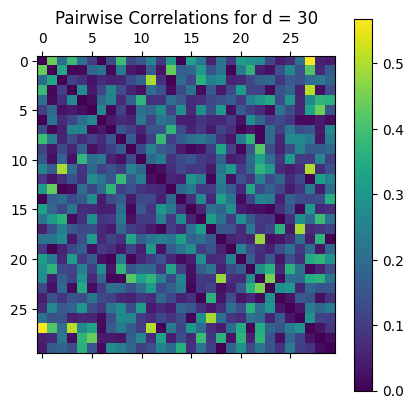

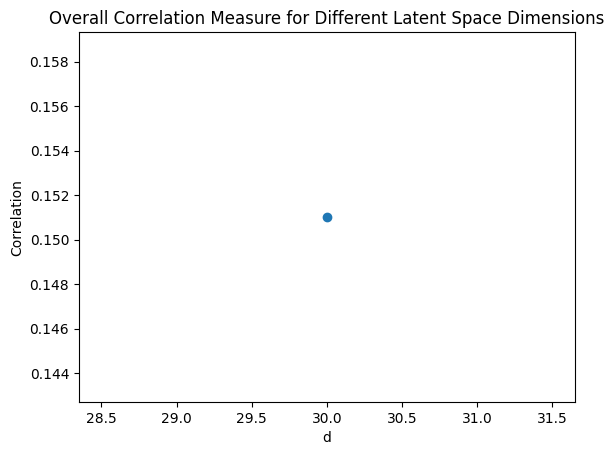

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


autoencoder = Autoencoder(30).to(device)
autoencoder.load_state_dict(torch.load("/content/conv_autoencoder.pth"))

d_values = [30]
corr_values = []
for d in d_values:
    # Collect encoded images
    encoded_images = []
    for i, (images, labels) in enumerate(trainloader):
        images = F.pad(images, pad=(2, 2, 2, 2), mode='constant', value=0) # Padding input image from 28x28 -> 32x32
        images = images.to(device)
        encoded = autoencoder.encoder(images)
        encoded_images.append(encoded.cpu().detach().numpy())
    encoded_images = np.concatenate(encoded_images, axis=0)

    # Calculate pairwise correlations
    pairwise_corr = np.zeros((d, d))
    for i in range(d):
        for j in range(d):
            if i != j:
                pairwise_corr[i, j] = pearsonr(encoded_images[:, i], encoded_images[:, j])[0]

    np.fill_diagonal(pairwise_corr, 0)

    # Calculate overall correlation measure
    corr_measure = np.mean(np.abs(pairwise_corr))
    corr_values.append(corr_measure)
    print(f'corr : {corr_measure}')
    # Plot results
    plt.matshow(np.abs(pairwise_corr))
    plt.colorbar()
    plt.title('Pairwise Correlations for d = {}'.format(d))
    plt.show()



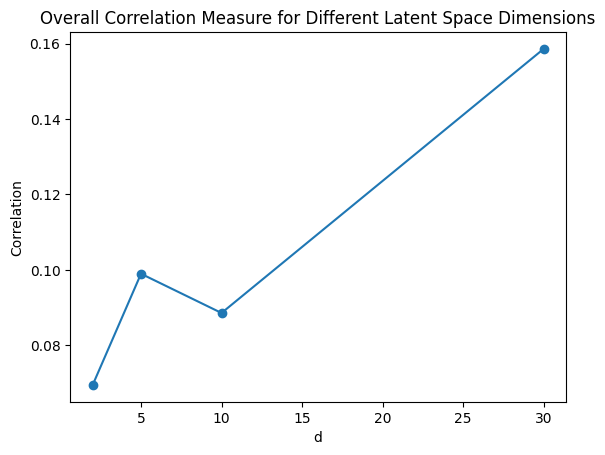

In [32]:
# Ploting corr graph
d_values = [2,5,10,30]
corr_values = [0.06945634109776594,0.09894810909949647, 0.088538081452462, 0.15859450986143567]
# Plot correlation values for all d
plt.plot(d_values, corr_values, '-o')
plt.xlabel('d')
plt.ylabel('Correlation')
plt.title('Overall Correlation Measure for Different Latent Space Dimensions')

plt.show()


**Transfer Learning**. Use a pre-trained encoder as a fixed network (i.e., exclude its weights from the following training optimization), and attach to it a small MLP (in latent space) and train only the latter to classify the digits (recall that MNIST is labeled).  We will make investigation over the two model methods to see which is better.


## **A multilayer perceptron (MLP)** is a misnomer for a modern **feedforward artificial neural network**, consisting of **fully connected** neurons with a nonlinear kind of activation function, organized in at least three layers, notable for being able to distinguish data that is not linearly separable.

Train only the encoder :

In [ ]:
# Define classification MLP
class MLP(nn.Module):
    def __init__(self, in_dim, out_dim, hidden_dim):
        super().__init__()
        self.fc1 = nn.Linear(in_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, out_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x



num_labels = 50
#Get a small fraction of training data
train_subset_indices = torch.randint(len(trainset), size=(num_labels,))
train_subset = torch.utils.data.Subset(trainset, train_subset_indices)



# Load pre-trained autoencoder
autoencoder = Autoencoder(10).to(device)
autoencoder.load_state_dict(torch.load("conv_autoencoder.pth"))

# Fix encoder weights
for param in autoencoder.encoder.parameters():
    param.requires_grad = False

# Define classification MLP
mlp = MLP(10, 10, 20).to(device)

# Define optimizer and loss function
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Train the classification MLP on a small subset of the training data
n_labels = 50


trainloader = torch.utils.data.DataLoader(train_subset, batch_size=1, shuffle=True)

for i, (images, labels) in enumerate(trainloader):
    if i == n_labels:
        break
    images = F.pad(images, pad=(2, 2, 2, 2), mode='constant', value=0).to(device) # Padding input image from 28x28 -> 32x32
    encoded = autoencoder.encoder(images)
    labels = labels.to(device)
    predicted = mlp(encoded)
    # print(f'predict: {predicted}')
    # print(f'labels : {labels}]')
    loss = loss_fn(predicted, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Evaluate the performance of the fixed autoencoder + MLP
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True)
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        images = F.pad(images, pad=(2, 2, 2, 2), mode='constant', value=0).to(device) # Padding input image from 28x28 -> 32x32
        encoded = autoencoder.encoder(images)
        labels = labels.to(device)
        predicted = mlp(encoded)
        _, predicted_labels = torch.max(predicted.data, 1)
        total += 1
        correct += (predicted_labels == labels).sum().item()

print('Accuracy of fixed autoencoder + MLP on the test images: %d %%' % (100 * correct / total))

# Train the full encoder + classifier
autoencoder = Autoencoder(10).to(device)
mlp = MLP(10, 10, 20).to(device)
optimizer = optim.Adam(list(autoencoder.encoder.parameters()) + list(mlp.parameters()), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

trainloader = torch.utils.data.DataLoader(train_subset, batch_size=1, shuffle=True)


for i, (images, labels) in enumerate(trainloader):
    if i == n_labels:
        break
    images = F.pad(images, pad=(2, 2, 2, 2), mode='constant', value=0).to(device) # Padding input image from 28x28 -> 32x32

    encoded = autoencoder.encoder(images)
    labels = labels.to(device)
    predicted = mlp(encoded)
    loss = loss_fn(predicted, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Evaluate the performance of the full encoder + MLP
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True)


correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        images = F.pad(images, pad=(2, 2, 2, 2), mode='constant', value=0).to(device) # Padding input image from 28x28 -> 32x32
        encoded = autoencoder.encoder(images)
        labels = labels.to(device)
        predicted = mlp(encoded)
        _, predicted_labels = torch.max(predicted.data, 1)
        total += 1
        correct += (predicted_labels == labels).sum().item()

print('Accuracy of autoencoder + MLP on the test images: %d %%' % (100 * correct / total))

Accuracy of fixed autoencoder + MLP on the test images: 7 %
Accuracy of autoencoder + MLP on the test images: 10 %
